<h1 style="font-size:3rem;color:red">MMS overview plot </h1>

#### [Go to FGM](#Magnetic-field-data) 
#### [Go to FPI-DIS](#FPI-DIS)
#### [Go to FPI-DES](#FPI-DES)


## libraries 


## Import the necessary libraries

In [1]:
import pyspedas
import pytplot
import numpy as np
import math
import matplotlib

# import some useful functions


from pyspedas import time_datetime 
from pyspedas.analysis.avg_data import avg_data


import matplotlib.pyplot as plt

### Example with MMS Data:
The **Magnetospheric Multiscale Mission (MMS)** collects data from a range of instruments, each with different time resolutions, expressed in both milliseconds (ms), seconds (s), and Hertz (Hz), Here, we mention some of MMS instruments that we will use during the practical course:

- **FGM (Fluxgate Magnetometer)**: Measures magnetic field data.
  - **Burst mode**: Time resolution of **7.81 ms** (128 Hz).
  - **Survey mode**: Time resolution of **62.5 ms** (16 Hz).

- **FPI (Fast Plasma Investigation)**: Measures plasma moments for both electrons and ions. The instrument is split into:
  - **DES (Dual Electron Spectrometer)**: Measures electron data.
    - **Burst mode**: Time resolution of **30 ms** (33.3 Hz).
    - **Survey mode**: Time resolution of **150 ms** (6.67 Hz).
  - **DIS (Dual Ion Spectrometer)**: Measures ion data.
    - **Burst mode**: Time resolution of **150 ms** (6.67 Hz).
    - **Survey mode**: Time resolution of **4.5 s** (0.22 Hz).

- **MEC (Mechanics Ephemeris)**: Provides spacecraft position and velocity.
  - Time resolution of **1 s** (1 Hz).

- **EDP (Electric Double Probe)**: Measures the electric field.
  - **Burst mode**: Time resolution of **0.122 ms** (8192 Hz).
  - **Survey mode**: Time resolution of **31.25 ms** (32 Hz).




## PySPEDAS
**PySPEDAS** is a Python package used to access and analyze space physics data, such as data from the Magnetospheric Multiscale (MMS) mission.

- `fgm`: Loads magnetic field data from the Fluxgate Magnetometer (FGM).
- `fpi`: Loads plasma data from the Fast Plasma Investigation (FPI).
- `edp`: Loads electric field data from the Electric Double Probe (EDP).
- `mec`: Loads spacecraft position data.
- `hpca`: Loads ion composition data from the Hot Plasma Composition Analyzer (HPCA).


We can import these functions as follows: 





In [3]:
from pyspedas import mms
from pyspedas.mms import fgm, fpi,edp

## Time interval

In [4]:
trange = ['2015-10-21/04:30:00', '2015-10-21/05:30:00']

#### Pick the Data from a Specific Satellite (MMS has 4 Identical Spacecraft)

For a quick look, it is recommended to use data from only one satellite in fast/survey mode. 


In [5]:
probe = '1'

## Magnetic field data 

In [6]:
fgm_vars =fgm(probe=probe, trange=trange, data_rate='srvy', varformat='*_gse_*', time_clip=True)

12-Oct-24 16:43:23: Loading pydata/mms1/fgm/srvy/l2/2015/10/mms1_fgm_srvy_l2_20151021_v4.18.0.cdf
12-Oct-24 16:43:25: Time clip was applied to: mms1_fgm_b_gse_srvy_l2
12-Oct-24 16:43:26: Time clip was applied to: mms1_fgm_flag_srvy_l2
12-Oct-24 16:43:26: Time clip was applied to: mms1_fgm_r_gse_srvy_l2
12-Oct-24 16:43:26: Loaded variables:
12-Oct-24 16:43:26: mms1_fgm_b_gse_srvy_l2
12-Oct-24 16:43:26: mms1_fgm_b_gse_srvy_l2_bvec
12-Oct-24 16:43:26: mms1_fgm_b_gse_srvy_l2_btot


## PyTplot
**PyTplot** is a Python library used for plotting time-series data, particularly useful for space physics data from missions like MMS.

### Key Function:
- `tplot`: Displays time-series plots of the loaded data.
<!-- - `get_data`: Retrieves data from a loaded tplot variable.
- `store_data`: Stores data into a tplot variable.
 -->
<!-- - `timebar`: Adds a vertical marker at a specified time on the plot. -->
<!-- <!-- - `tplot_names`: Lists the names of all datasets loaded into the session. -->
<!-- - `options` and `tplot_options`: Configure the appearance of plots (e.g., axis labels, colors).
- `tlimit`: Sets time limits on the plot (x-axis).
- `ylim` and `zlim`: Set y-axis and z-axis limits, respectively. -->
 -->

In [7]:
from pytplot import tplot 

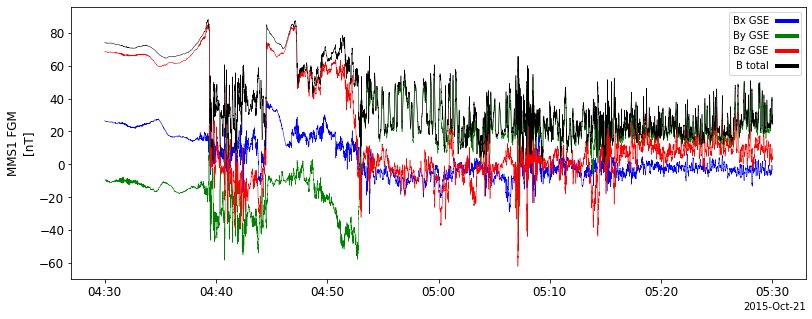

In [8]:
tplot('mms1_fgm_b_gse_srvy_l2')

## FPI-DIS 

In [9]:
ion_vars_fpi = fpi(datatype='dis-moms',probe=probe, data_rate='fast', trange=trange, center_measurement=True , time_clip=True)

12-Oct-24 16:43:28: Loading pydata/mms1/fpi/fast/l2/dis-moms/2015/10/mms1_fpi_fast_l2_dis-moms_20151021040000_v3.4.0.cdf
12-Oct-24 16:43:29: Time clip was applied to: mms1_dis_errorflags_fast
12-Oct-24 16:43:29: Time clip was applied to: mms1_dis_startdelphi_count_fast
12-Oct-24 16:43:29: Time clip was applied to: mms1_dis_startdelphi_angle_fast
12-Oct-24 16:43:29: Time clip was applied to: mms1_dis_energyspectr_px_fast
12-Oct-24 16:43:29: Time clip was applied to: mms1_dis_energyspectr_mx_fast
12-Oct-24 16:43:29: Time clip was applied to: mms1_dis_energyspectr_py_fast
12-Oct-24 16:43:29: Time clip was applied to: mms1_dis_energyspectr_my_fast
12-Oct-24 16:43:29: Time clip was applied to: mms1_dis_energyspectr_pz_fast
12-Oct-24 16:43:29: Time clip was applied to: mms1_dis_energyspectr_mz_fast
12-Oct-24 16:43:29: Time clip was applied to: mms1_dis_energyspectr_omni_fast
12-Oct-24 16:43:29: Time clip was applied to: mms1_dis_spectr_bg_fast
12-Oct-24 16:43:29: Time clip was applied to: mm

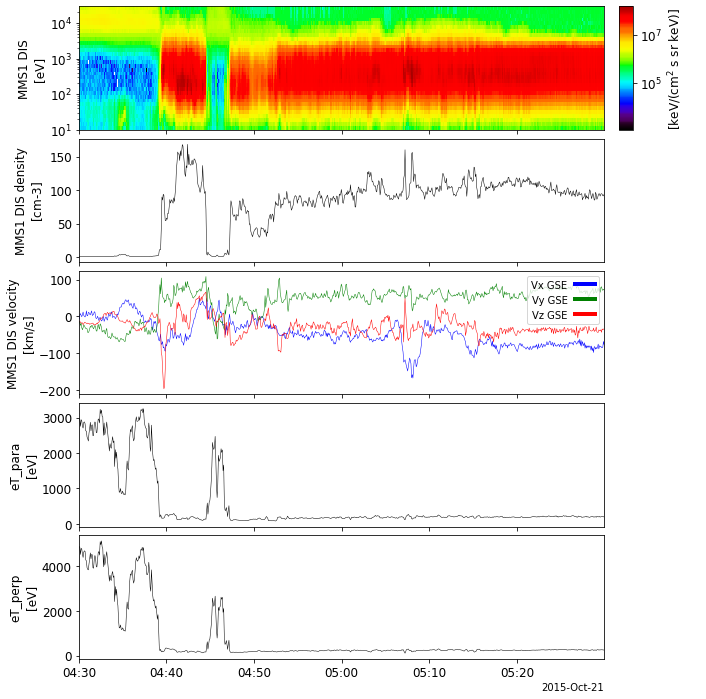

In [10]:
tplot(['mms1_dis_energyspectr_omni_fast','mms1_dis_numberdensity_fast','mms1_dis_bulkv_gse_fast','mms1_dis_temppara_fast','mms1_dis_tempperp_fast'],xsize=10,ysize=12)

## FPI-DES

In [11]:
electron_vars_fpi = fpi(datatype='des-moms',probe=probe, data_rate='fast', trange=trange, center_measurement=True, time_clip=True)

12-Oct-24 16:43:32: Loading pydata/mms1/fpi/fast/l2/des-moms/2015/10/mms1_fpi_fast_l2_des-moms_20151021040000_v3.4.0.cdf
12-Oct-24 16:43:32: Time clip was applied to: mms1_des_errorflags_fast
12-Oct-24 16:43:32: Time clip was applied to: mms1_des_startdelphi_count_fast
12-Oct-24 16:43:32: Time clip was applied to: mms1_des_startdelphi_angle_fast
12-Oct-24 16:43:32: Time clip was applied to: mms1_des_pitchangdist_lowen_fast
12-Oct-24 16:43:32: Time clip was applied to: mms1_des_pitchangdist_miden_fast
12-Oct-24 16:43:32: Time clip was applied to: mms1_des_pitchangdist_highen_fast
12-Oct-24 16:43:32: Time clip was applied to: mms1_des_energyspectr_px_fast
12-Oct-24 16:43:32: Time clip was applied to: mms1_des_energyspectr_mx_fast
12-Oct-24 16:43:32: Time clip was applied to: mms1_des_energyspectr_py_fast
12-Oct-24 16:43:32: Time clip was applied to: mms1_des_energyspectr_my_fast
12-Oct-24 16:43:32: Time clip was applied to: mms1_des_energyspectr_pz_fast
12-Oct-24 16:43:32: Time clip was 

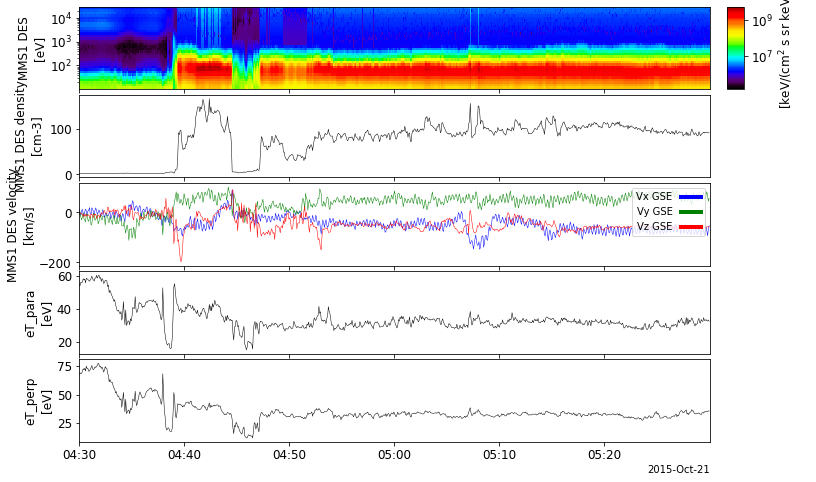

In [12]:
tplot(['mms1_des_energyspectr_omni_fast','mms1_des_numberdensity_fast','mms1_des_bulkv_gse_fast','mms1_des_temppara_fast','mms1_des_tempperp_fast'])

## Get the data from the tplot variables

In [13]:
from pytplot import get,get_data

In [14]:
datane_1=['mms1_des_numberdensity_fast']
datani_1=['mms1_dis_numberdensity_fast']

datave_1=['mms1_des_bulkv_gse_fast']
datavi_1=['mms1_dis_bulkv_gse_fast']

dataTi_para_1=['mms1_dis_temppara_fast']
dataTi_perp_1=['mms1_dis_tempperp_fast']

dataTe_para_1=['mms1_des_temppara_fast']
dataTe_perp_1=['mms1_des_tempperp_fast']

In `get` function, astropy units are attached to the data by default

In [48]:
times,ne_1=get_data(datane_1[0])
metadatane_1=get_data(datane_1[0],metadata=True)

times,ni_1=get_data(datani_1[0])
metadatani_1=get_data(datani_1[0],metadata=True)

In [49]:
times,Ti_para_1=get_data(dataTi_para_1[0])
metadataTi_para_1=get_data(dataTi_para_1[0],metadata=True)

times,Ti_perp_1=get_data(dataTi_perp_1[0])
metadataTi_perp_1=get_data(dataTi_perp_1[0],metadata=True)

In [50]:
times,Te_para_1=get_data(dataTe_para_1[0])
metadataTe_para_1=get_data(dataTe_para_1[0],metadata=True)

times,Te_perp_1=get_data(dataTe_perp_1[0])
metadataTe_perp_1=get_data(dataTe_perp_1[0],metadata=True)

In [51]:
times,ve_1=get_data(datave_1[0])
metadatave_1=get_data(datave_1[0],metadata=True)

times,vi_1=get_data(datavi_1[0])
metadatavi_1=get_data(datavi_1[0],metadata=True)

In [52]:
from pytplot import store,store_data

In [53]:
store('ne_1', data={'x': times, 'y': ne_1})

True

In [54]:
tplot('ne_1')

In [55]:
store('ne_1', data={'x': times, 'y': ne_1},metadata=metadatane_1)

True

## Dealing with data with higher resoulution 

In [56]:
times,b_1=get_data('mms1_fgm_b_gse_srvy_l2')

In [57]:
b_1.shape

(57599, 4)

In [58]:
ne_1.shape

(800,)

- `avg_data`: Computes average values of time-series data over a specified time period.


In [59]:
tavg=4.5  # it is the 'fast' resolution of FPI instrument. 
avg_data('mms1_fgm_b_gse_srvy_l2', res=tavg)    

12-Oct-24 16:46:57: avg_data was applied to: mms1_fgm_b_gse_srvy_l2-avg


In [60]:
datab1=['mms1_fgm_b_gse_srvy_l2-avg']

In [61]:
times,b_1=get_data(datab1[0])

In [62]:
metadatab_1=get_data(datab1[0],metadata=True)

In [63]:
b_1.shape

(800, 4)

### Now store all the data we have and recall the metadata

In [64]:
store('b_1', data={'x': times, 'y': b_1},metadata=metadatab_1)
store('ne_1', data={'x': times, 'y': ne_1},metadata=metadatane_1)
store('ni_1', data={'x': times, 'y': ni_1},metadata=metadatani_1)
store('Ti_para_1', data={'x': times, 'y': Ti_para_1},metadata=metadataTi_para_1)
store('Ti_perp_1', data={'x': times, 'y': Ti_perp_1},metadata=metadataTi_perp_1)

store('Te_para_1', data={'x': times, 'y': Te_para_1},metadata=metadataTe_para_1)
store('Te_perp_1', data={'x': times, 'y': Te_perp_1},metadata=metadataTe_perp_1)

store('ve_1', data={'x': times, 'y': ve_1},metadata=metadatave_1)
store('vi_1', data={'x': times, 'y': vi_1},metadata=metadatavi_1)


True

### Compine two tplot variables together 

In [65]:
store("n_1", data=['ne_1', 'ni_1'])

True

In [66]:
tplot('n_1')

To better visualize the density here, use the `log` option for this event as the density varies.


help(options)

In [67]:
from pytplot import options

In [68]:
options('n_1','ylog',1)
options('n_1','Color',['r','b'])
options('n_1', 'ytitle', 'n$_{1}$')
options('n_1', 'ysubtitle', '[cm-3]')
options('n_1','legend_names',['ne','ni'])
options('n_1', 'thick',1)
options('n_1', 'char_size', 15)


In [69]:
tplot('n_1')

### MMS Data: Units for Key Parameters

- **Number density (nₑ, nᵢ):** cm⁻³
- **Velocity (vₑ, vᵢ):** km/s
- **Magnetic Field (B):** nT
- **Electric Field (E):** mV/m
- **Temperature ($T_e$, $T_i$):** eV


## Constants

In [70]:
import math


# Physical constants
mu0 = 4 * math.pi * 1e-7                # Permeability of free space (H/m)
qe = 1.602176634 * 1e-19                # Elementary charge (Coulombs)
mi = 1.6726219 * 1e-27                  # Proton mass (kg)
me = 9.10938356 * 1e-31                 # Electron mass (kg)
e0 = 8.854187817 * 1e-12                # Permittivity of free space (F/m)
c = 3.0 * 1e8                           # Speed of light (m/s)
kb = 1.380649 * 1e-23  # Boltzmann constant in J/K

# Conversion
kmtom = 1e3                             # Kilometer to meter conversion factor
cm3tom3 = 1e6                           # cm³ to m³ conversion factor
ev_to_kelvin = 11604.5  # 1 eV in Kelvin
conv_pressure = 1e6 * qe                # Conversion factor for pressure (Pa or J/m³)


### Exercise: 

### Dynamic Pressure Formula

Calculate the dynamic pressure $P_{dyn}$ (in nPa):

$$
P_{dyn} = \frac{1}{2} n_i m_i v_i^2$$


In [71]:
vi_tot=np.linalg.norm(vi_1,axis=1)
Pdyn = 0.5 * ni_1 * cm3tom3 * mi *(kmtom *vi_tot)**2 * 1e9
store_data('Pdyn', data={'x': times, 'y': Pdyn})

True

In [72]:
tplot('Pdyn')

# Thermal pressure

### Isotropic Ion Pressure $( P_{\text{iso},i} $) in nPa

The ion isotropic pressure is defined as:

$$
P_{iso,i} = n_i k_b T_i
$$

Where:
- $ n_i $ is the ion density in $cm^{-3} $ (converted to $ m^{-3} $).
- $ T_i $ is the average ion temperature in eV.
- $ k_b $ is the *Boltzmann* constant

The average ion temperature is calculated as:

$$
T_i = \frac{2 T_{\perp,i} + T_{\parallel,i}}{3}
$$

The pressure is then converted to nanoPascals (nPa) using:

$$
P_{iso,i} = n_i k_b T_i \times 1.60218 \times 10^{-9} \times 10^6 \times 10^9 \, \text{nPa}
$$

In [73]:
Ti_1=(Ti_para_1+2*Ti_perp_1)/3

In [74]:
Pi_1=ni_1*Ti_1*cm3tom3*kb*ev_to_kelvin*1e9

In [75]:
store_data('Pi_1', data={'x': times, 'y':Pi_1 })

True

### Isotropic Electron Pressure ( $P_{iso,e}$ ):

For electrons, the isotropic pressure is:

$$
P_{iso,e} = n_e k_b T_e
$$

Where $ n_e $ is the electron density and $ T_e $ is the average electron temperature.


In [76]:
Te_1=(Te_para_1+2*Te_perp_1)/3
Pe_1=ne_1*Te_1*cm3tom3*kb*ev_to_kelvin*1e9

### Total Thermal Pressure:

The total thermal pressure is the sum of ion and electron pressures:

$$
P_{th} = P_{iso,i} + P_{iso,e}
$$

In [77]:
Pth_1=Pi_1+Pe_1

In [78]:
store_data('Pth_1', data={'x': times, 'y': Pth_1})
options('Pth_1','Color',['k'])
options('Pth_1', 'ytitle', '$P_{dyn}$')
options('Pth_1', 'ysubtitle', '[nPa]')
options('Pth_1', 'thick',1)
options('Pth_1', 'char_size', 15)
tplot('Pth_1')

### Magnetic Pressure ($ P_{mag} $):

Magnetic pressure is calculated as:

$$
P_{mag} = \frac{B^2}{2\mu_0}
$$

Where:
- $ B $ is the magnetic field in nT.
- $ \mu_0 = 4\pi \times 10^{-7} \, \text{N}/\text{A}^2 $ is the permeability of free space.

The conversion to nPa is given by:

$$
P_{mag} = \frac{B^2}{2\mu_0} \times 10^{-18} \times 10^9
$$





In [79]:
Btot_1=b_1[:,3]
Pmag_1=1e-9*(Btot_1)**2/(2*mu0)

In [80]:
store_data('Pmag_1',data={'x':times,'y':Pmag_1})
options('Pmag_1','Color',['k'])
options('Pmag_1', 'ytitle', '$P_{mag}$')
options('Pmag_1', 'ysubtitle', '[nPa]')
options('Pmag_1', 'thick',1)
options('Pmag_1', 'char_size', 15)
tplot('Pmag_1')

## Total pressure

In [81]:
help(store)

Help on function store in module pytplot.store_data:

store(name, data=None, delete=False, newname=None, metadata={})
    This function creates a "Tplot Variable" based on the inputs, and
    stores this data in memory.  Tplot Variables store all of the information
    needed to generate a plot.
    
    Parameters:
        name : str
            Name of the tplot variable that will be created
        data : dict
            A python dictionary object.
    
            'x' should be a 1-dimensional array that represents the data's x axis.  Typically this data is time,
            represented in seconds since epoch (January 1st 1970)
    
            'y' should be the data values. This can be 2 dimensions if multiple lines or a spectrogram are desired.
    
            'v' is optional, and is only used for spectrogram plots.  This will be a list of bins to be used.  If this
            is provided, then 'y' should have dimensions of x by z.
    
            'v1/v2/v3/etc' are also optio

In [82]:
Ptot_1=Pmag_1+Pth_1

In [92]:
store_data('Ptot_1',data={'x':times,'y':Ptot_1})
options('Ptot_1','Color',['k'])
options('Ptot_1', 'ytitle', '$P_{total}$')
options('Ptot_1', 'ysubtitle', '[nPa]')
options('Ptot_1', 'thick',1)
options('Ptot_1', 'char_size', 15)
tplot('Ptot_1')

#### Excercise: Put Pmag,Pth, and Ptot in one tplot variable

In [95]:
store("Pressure", data=['Ptot_1','Pmag_1', 'Pth_1'])
options('Pressure','Color',['k','r','b'])
options('Pressure', 'ytitle', '$Pressure$')
options('Pressure', 'ysubtitle', '[nPa]')
options('Pressure', 'thick',1)
options('Pressure', 'char_size', 15)
tplot('Pressure')

In [94]:
tplot('Pressure')

### Alfvén Velocity:

The Alfvén velocity is given by:

$$
v_A = \frac{B}{\sqrt{\mu_0 n_i m_i}}
$$


In [96]:
v_A_1 = Btot_1*1e-9 / np.sqrt(mu0 *ni_1*cm3tom3 * mi)*1e-3 # 1e-3 to have km/s

In [97]:
store('v_A_1',data={'x':times,'y':v_A_1})
options('v_A_1','Color',['k'])
options('v_A_1', 'ytitle', '$v_{A}$')
options('v_A_1', 'ysubtitle', '[km/s]')
options('v_A_1', 'thick',1)
options('v_A_1', 'char_size', 15)
tplot('v_A_1')

### Plasma Beta:

- Plasma beta ($\beta$):

$$
\beta = \frac{P_{th}}{P_{mag}}
$$


In [85]:
Beta_1=Pth_1/Pmag_1

In [86]:
store('Beta_1',data={'x':times,'y':Beta_1})
options('Beta_1','Color',['k'])
options('Beta_1', 'ytitle', ' β')
options('Beta_1', 'thick',1)
options('Beta_1', 'char_size', 15)
tplot(['Beta_1'])

# Exercise: Plot an Overview Figure

Using tplot, create a plot that includes the following parameters:

1. **Magnetic Field (B)**: Plot the magnetic field data.

2. **Electron and Ion Number Densities (ne, ni)**: Plot both electron and ion number densities in the same panel using a logarithmic scale for the y-axis.

3. **Electron and Ion Temperatures (Te_para, Te_perp, Ti_para, Ti_perp)**: Plot the parallel and perpendicular temperatures of electrons and ions on the same panel, using a logarithmic scale for the y-axis.

4. **Ion OMNI Spectrogram**: Plot the ion omni-directional spectrogram (energy distribution of ions).

5. **Electron OMNI Spectrogram**: Plot the electron omni-directional spectrogram (energy distribution of electrons).

6. **Ion Velocity**: Plot the velocity of ions.

7. **Pressure Components (Magnetic, Thermal, and Total Pressure)**: Plot the magnetic pressure, thermal pressure, and the total pressure in the same panel.

## Instructions:
- Ensure that all axes are properly labeled, and units are specified where necessary.
- Make sure the panels are aligned neatly, and different parameters are color-coded for clarity.
- Use appropriate scaling (e.g., log)


In [98]:
store("T_1", data=['Ti_para_1', 'Ti_perp_1','Te_para_1','Te_perp_1'])
options('T_1','ylog',1)
options('T_1','Color',['k','r','g','b'])
options('T_1', 'ytitle', 'T')
options('T_1', 'ysubtitle', '[eV]')
options('T_1','legend_names',['$T_{e,∥}$','$T_{e,⟂}$','$T_{i,∥}$','$T_{i,⟂}$'])
options('T_1', 'thick',1)
options('T_1', 'char_size', 15)

In [88]:
tplot('T_1')

12-Oct-24 16:48:07: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 16:48:07: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 16:48:07: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 16:48:07: Substituting symbol ⟂ from STIXGeneral


In [89]:
options('n_1','ylog',1)
options('n_1','Color',['r','b'])
options('n_1', 'ytitle', '$n$')
options('n_1', 'ysubtitle', '[$cm^{-3}$]')
options('n_1','legend_names',['$n_e$','$n_i$'])
options('n_1', 'thick',1)
options('n_1', 'char_size', 15)

In [90]:
options('b_1', 'thick',1)
options('ve_1', 'thick',1)
options('vi_1', 'thick',1)

In [99]:
tplot(['b_1','mms1_dis_energyspectr_omni_fast','mms1_des_energyspectr_omni_fast','n_1','T_1','ve_1','vi_1','Pressure'],xsize=10,ysize=14)#, save_png='myfile')

12-Oct-24 16:54:43: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 16:54:43: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 16:54:43: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 16:54:43: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 16:54:43: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 16:54:43: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 16:54:43: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 16:54:43: Substituting symbol ⟂ from STIXGeneral


In [ ]:
Excercise: Use : to zoom in to the the region where we observe a jet with vz component= -200 km/s 

In [107]:
from pytplot import tlimit

In [108]:
tlimit(['2015-10-21/04:30:00', '2015-10-21/04:45:00'])

In [113]:
tplot(['b_1','mms1_dis_energyspectr_omni_fast','mms1_des_energyspectr_omni_fast','n_1','T_1','ve_1','vi_1','Pressure'],xsize=10,ysize=14)#, save_png='myfile')

12-Oct-24 17:02:21: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 17:02:21: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 17:02:21: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 17:02:21: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 17:02:21: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 17:02:21: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 17:02:21: Substituting symbol ⟂ from STIXGeneral
12-Oct-24 17:02:21: Substituting symbol ⟂ from STIXGeneral


In [115]:
tlimit(Full=True)

TypeError: tlimit() got an unexpected keyword argument 'Full'

In [114]:
help(tlimit)

Help on function tlimit in module pytplot.tlimit:

tlimit(arg=None, full=False, last=False)

